In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
#n_units=64
#n_units=128
#n_units=256
#n_units=512
n_units=1024

In [4]:
os.chdir('E:\\MLdataset')

In [5]:
x_csv = pd.read_csv('x_5degree_1rev.csv',header=None)

In [6]:
x_5degree = x_csv.to_numpy(dtype='float32')

In [7]:
x = x_5degree[:, 0:15]

In [8]:
x = x.reshape((73*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(1rev_5deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [12]:
y = y_5degree.reshape((73*6, 100, 100))

In [13]:
tsr = x_5degree[:, -2]

In [14]:
theta = x_5degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(394, 100, 100)


In [17]:
print(y_test.shape)

(44, 100, 100)


In [18]:
print(x_train.shape)

(394, 15, 1)


In [19]:
print(x_test.shape)

(44, 15, 1)


In [20]:
theta_train.shape

(394,)

In [21]:
tsr_train.shape

(394,)

In [22]:
tsr_test[10]

1.8

In [23]:
tsr_test[18]

1.6

In [24]:
theta_test[10]

360.0

In [25]:
theta_test[18]

0.0

In [26]:
os.chdir('C:\\Users\\User')

In [27]:
input_time = tf.keras.Input(shape=(2, 1))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayerSensor')(x_)
output_image = tf.keras.layers.Reshape((100,100))(output_data)
# MLP
sd = tf.keras.Model(input_time, output_image)

In [28]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 1024)             3072      
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 1024)             1049600   
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 1024)             1049600   
 se)                                                             
                                                             

In [29]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
           loss = tf.keras.losses.MeanSquaredError(),
           metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [30]:
theta_train_nor = theta_train / 360
theta_test_nor = theta_test / 360

In [31]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train_nor.reshape((-1,1)))).reshape((394, 2, 1))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test_nor.reshape((-1,1)))).reshape((44, 2, 1))

In [32]:
tsr_theta_train.shape

(394, 2, 1)

In [33]:
start = datetime.datetime.now()
history = sd.fit(tsr_theta_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
10/10 [==============================] - 1s 8ms/step - loss: 0.0111 - rmse: 0.1038
Epoch 2/10000
10/10 [==============================] - 0s 8ms/step - loss: 0.0105 - rmse: 0.1009
Epoch 3/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0091 - rmse: 0.0938
Epoch 4/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0078 - rmse: 0.0866
Epoch 5/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0074 - rmse: 0.0842
Epoch 6/10000
10/10 [==============================] - 0s 8ms/step - loss: 0.0074 - rmse: 0.0841
Epoch 7/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0074 - rmse: 0.0839
Epoch 8/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0073 - rmse: 0.0839
Epoch 9/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0073 - rmse: 0.0839
Epoch 10/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0073 - rmse: 0.0838
Epoch 11/10000
10/10 [=======

10/10 [==============================] - 0s 7ms/step - loss: 0.0061 - rmse: 0.0766
Epoch 85/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0061 - rmse: 0.0764
Epoch 86/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0061 - rmse: 0.0761
Epoch 87/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0060 - rmse: 0.0758
Epoch 88/10000
10/10 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0758
Epoch 89/10000
10/10 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0765
Epoch 90/10000
10/10 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0759
Epoch 91/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0060 - rmse: 0.0759
Epoch 92/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0060 - rmse: 0.0756
Epoch 93/10000
10/10 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0753
Epoch 94/10000
10/10 [=============

10/10 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0608
Epoch 168/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0604
Epoch 169/10000
10/10 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0596
Epoch 170/10000
10/10 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0590
Epoch 171/10000
10/10 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0587
Epoch 172/10000
10/10 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0582
Epoch 173/10000
10/10 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0579
Epoch 174/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0577
Epoch 175/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0580
Epoch 176/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0577
Epoch 177/10000
10/10 [===

10/10 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0373
Epoch 250/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0374
Epoch 251/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0372
Epoch 252/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0369
Epoch 253/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0367
Epoch 254/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0365
Epoch 255/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0363
Epoch 256/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0359
Epoch 257/10000
10/10 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0358
Epoch 258/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0359
Epoch 259/10000
10/10 [===

10/10 [==============================] - 0s 7ms/step - loss: 8.8232e-04 - rmse: 0.0260
Epoch 332/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.7598e-04 - rmse: 0.0259
Epoch 333/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.6843e-04 - rmse: 0.0257
Epoch 334/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.5892e-04 - rmse: 0.0255
Epoch 335/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.5669e-04 - rmse: 0.0255
Epoch 336/10000
10/10 [==============================] - 0s 8ms/step - loss: 8.6270e-04 - rmse: 0.0256
Epoch 337/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.5124e-04 - rmse: 0.0254
Epoch 338/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.4315e-04 - rmse: 0.0253
Epoch 339/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.5264e-04 - rmse: 0.0254
Epoch 340/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.4131e-04 -

10/10 [==============================] - 0s 7ms/step - loss: 6.2199e-04 - rmse: 0.0207
Epoch 411/10000
10/10 [==============================] - 0s 8ms/step - loss: 5.9964e-04 - rmse: 0.0202
Epoch 412/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.9553e-04 - rmse: 0.0201
Epoch 413/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.8684e-04 - rmse: 0.0199
Epoch 414/10000
10/10 [==============================] - 0s 8ms/step - loss: 5.8347e-04 - rmse: 0.0198
Epoch 415/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.7783e-04 - rmse: 0.0197
Epoch 416/10000
10/10 [==============================] - 0s 8ms/step - loss: 5.7608e-04 - rmse: 0.0196
Epoch 417/10000
10/10 [==============================] - 0s 8ms/step - loss: 5.7147e-04 - rmse: 0.0195
Epoch 418/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.6305e-04 - rmse: 0.0193
Epoch 419/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.6816e-04 -

10/10 [==============================] - 0s 7ms/step - loss: 4.9698e-04 - rmse: 0.0178
Epoch 490/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.6419e-04 - rmse: 0.0169
Epoch 491/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.5869e-04 - rmse: 0.0167
Epoch 492/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.4051e-04 - rmse: 0.0161
Epoch 493/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.3079e-04 - rmse: 0.0158
Epoch 494/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.3147e-04 - rmse: 0.0159
Epoch 495/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.3896e-04 - rmse: 0.0161
Epoch 496/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.3547e-04 - rmse: 0.0160
Epoch 497/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.3657e-04 - rmse: 0.0160
Epoch 498/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.3509e-04 -

10/10 [==============================] - 0s 7ms/step - loss: 3.5187e-04 - rmse: 0.0135
Epoch 569/10000
10/10 [==============================] - 0s 7ms/step - loss: 3.5716e-04 - rmse: 0.0137
Epoch 570/10000
10/10 [==============================] - 0s 7ms/step - loss: 3.6267e-04 - rmse: 0.0139
Epoch 571/10000
10/10 [==============================] - 0s 7ms/step - loss: 3.6769e-04 - rmse: 0.0141
Epoch 572/10000
10/10 [==============================] - 0s 7ms/step - loss: 3.5989e-04 - rmse: 0.0138
Epoch 573/10000
10/10 [==============================] - 0s 7ms/step - loss: 3.6932e-04 - rmse: 0.0141
Epoch 574/10000
10/10 [==============================] - 0s 7ms/step - loss: 3.6038e-04 - rmse: 0.0138
Epoch 575/10000
10/10 [==============================] - 0s 7ms/step - loss: 3.6018e-04 - rmse: 0.0138
Epoch 576/10000
10/10 [==============================] - 0s 7ms/step - loss: 3.6666e-04 - rmse: 0.0140
Epoch 577/10000
10/10 [==============================] - 0s 7ms/step - loss: 3.7348e-04 -

10/10 [==============================] - 0s 7ms/step - loss: 3.0859e-04 - rmse: 0.0121
Epoch 648/10000
10/10 [==============================] - 0s 7ms/step - loss: 3.1104e-04 - rmse: 0.0122
Epoch 649/10000
10/10 [==============================] - 0s 7ms/step - loss: 3.1077e-04 - rmse: 0.0122
Epoch 650/10000
10/10 [==============================] - 0s 7ms/step - loss: 3.0859e-04 - rmse: 0.0121
Epoch 651/10000
10/10 [==============================] - 0s 7ms/step - loss: 3.0490e-04 - rmse: 0.0120
Epoch 652/10000
10/10 [==============================] - 0s 8ms/step - loss: 3.1097e-04 - rmse: 0.0122
Epoch 653/10000
10/10 [==============================] - 0s 7ms/step - loss: 3.0706e-04 - rmse: 0.0121
Epoch 654/10000
10/10 [==============================] - 0s 7ms/step - loss: 3.0697e-04 - rmse: 0.0121
Epoch 655/10000
10/10 [==============================] - 0s 7ms/step - loss: 3.1579e-04 - rmse: 0.0124
Epoch 656/10000
10/10 [==============================] - 0s 7ms/step - loss: 3.2008e-04 -

10/10 [==============================] - 0s 7ms/step - loss: 2.7146e-04 - rmse: 0.0108
Epoch 727/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.6922e-04 - rmse: 0.0107
Epoch 728/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.7058e-04 - rmse: 0.0108
Epoch 729/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.7053e-04 - rmse: 0.0108
Epoch 730/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.7341e-04 - rmse: 0.0109
Epoch 731/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.7248e-04 - rmse: 0.0109
Epoch 732/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.7285e-04 - rmse: 0.0109
Epoch 733/10000
10/10 [==============================] - 0s 8ms/step - loss: 2.7705e-04 - rmse: 0.0111
Epoch 734/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.7326e-04 - rmse: 0.0109
Epoch 735/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.7009e-04 -

10/10 [==============================] - 0s 7ms/step - loss: 2.8617e-04 - rmse: 0.0117
Epoch 806/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.7425e-04 - rmse: 0.0112
Epoch 807/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.6942e-04 - rmse: 0.0110
Epoch 808/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.6103e-04 - rmse: 0.0106
Epoch 809/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.5591e-04 - rmse: 0.0103
Epoch 810/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.5564e-04 - rmse: 0.0103
Epoch 811/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.5572e-04 - rmse: 0.0103
Epoch 812/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.5358e-04 - rmse: 0.0102
Epoch 813/10000
10/10 [==============================] - 0s 8ms/step - loss: 2.5269e-04 - rmse: 0.0102
Epoch 814/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.4796e-04 -

10/10 [==============================] - 0s 7ms/step - loss: 2.2472e-04 - rmse: 0.0090
Epoch 885/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.2336e-04 - rmse: 0.0089
Epoch 886/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.2522e-04 - rmse: 0.0090
Epoch 887/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.3092e-04 - rmse: 0.0093
Epoch 888/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.3592e-04 - rmse: 0.0096
Epoch 889/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.3555e-04 - rmse: 0.0096
Epoch 890/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.3429e-04 - rmse: 0.0095
Epoch 891/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.3550e-04 - rmse: 0.0096
Epoch 892/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.4573e-04 - rmse: 0.0101
Epoch 893/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.4660e-04 -

10/10 [==============================] - 0s 7ms/step - loss: 2.2117e-04 - rmse: 0.0090
Epoch 964/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.2840e-04 - rmse: 0.0094
Epoch 965/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.2924e-04 - rmse: 0.0094
Epoch 966/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.2563e-04 - rmse: 0.0093
Epoch 967/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.3163e-04 - rmse: 0.0096
Epoch 968/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.2986e-04 - rmse: 0.0095
Epoch 969/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.3157e-04 - rmse: 0.0096
Epoch 970/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.2863e-04 - rmse: 0.0094
Epoch 971/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.4023e-04 - rmse: 0.0100
Epoch 972/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.2978e-04 -

10/10 [==============================] - 0s 7ms/step - loss: 2.1924e-04 - rmse: 0.0091
Epoch 1043/10000
10/10 [==============================] - 0s 8ms/step - loss: 2.2564e-04 - rmse: 0.0094
Epoch 1044/10000
10/10 [==============================] - 0s 8ms/step - loss: 2.1884e-04 - rmse: 0.0091
Epoch 1045/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.1573e-04 - rmse: 0.0089
Epoch 1046/10000
10/10 [==============================] - 0s 8ms/step - loss: 2.1808e-04 - rmse: 0.0090
Epoch 1047/10000
10/10 [==============================] - 0s 8ms/step - loss: 2.1346e-04 - rmse: 0.0088
Epoch 1048/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.0861e-04 - rmse: 0.0085
Epoch 1049/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.0910e-04 - rmse: 0.0085
Epoch 1050/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.1052e-04 - rmse: 0.0086
Epoch 1051/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.0

10/10 [==============================] - 0s 7ms/step - loss: 1.9994e-04 - rmse: 0.0082
Epoch 1121/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.9986e-04 - rmse: 0.0082
Epoch 1122/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.9983e-04 - rmse: 0.0082
Epoch 1123/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.9457e-04 - rmse: 0.0078
Epoch 1124/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.9569e-04 - rmse: 0.0079
Epoch 1125/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.9739e-04 - rmse: 0.0080
Epoch 1126/10000
10/10 [==============================] - 0s 8ms/step - loss: 2.1033e-04 - rmse: 0.0088
Epoch 1127/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.0609e-04 - rmse: 0.0085
Epoch 1128/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.0722e-04 - rmse: 0.0086
Epoch 1129/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.0

10/10 [==============================] - 0s 7ms/step - loss: 2.0326e-04 - rmse: 0.0085
Epoch 1199/10000
10/10 [==============================] - 0s 8ms/step - loss: 2.0185e-04 - rmse: 0.0084
Epoch 1200/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.9357e-04 - rmse: 0.0079
Epoch 1201/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.8961e-04 - rmse: 0.0077
Epoch 1202/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.8869e-04 - rmse: 0.0076
Epoch 1203/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.8795e-04 - rmse: 0.0076
Epoch 1204/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.8647e-04 - rmse: 0.0075
Epoch 1205/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.9111e-04 - rmse: 0.0078
Epoch 1206/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.9889e-04 - rmse: 0.0083
Epoch 1207/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.9

10/10 [==============================] - 0s 7ms/step - loss: 2.0272e-04 - rmse: 0.0086
Epoch 1277/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.0535e-04 - rmse: 0.0088
Epoch 1278/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.0636e-04 - rmse: 0.0088
Epoch 1279/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.9345e-04 - rmse: 0.0081
Epoch 1280/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.9153e-04 - rmse: 0.0080
Epoch 1281/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.8649e-04 - rmse: 0.0076
Epoch 1282/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.0311e-04 - rmse: 0.0087
Epoch 1283/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.9430e-04 - rmse: 0.0081
Epoch 1284/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.9324e-04 - rmse: 0.0081
Epoch 1285/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.9

10/10 [==============================] - 0s 7ms/step - loss: 1.8487e-04 - rmse: 0.0077
Epoch 1355/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.9414e-04 - rmse: 0.0083
Epoch 1356/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.8346e-04 - rmse: 0.0076
Epoch 1357/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.8005e-04 - rmse: 0.0074
Epoch 1358/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.8213e-04 - rmse: 0.0075
Epoch 1359/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.8440e-04 - rmse: 0.0077
Epoch 1360/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.9796e-04 - rmse: 0.0085
Epoch 1361/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.0464e-04 - rmse: 0.0089
Epoch 1362/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.9275e-04 - rmse: 0.0082
Epoch 1363/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.9

10/10 [==============================] - 0s 7ms/step - loss: 1.8712e-04 - rmse: 0.0080
Epoch 1433/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.9931e-04 - rmse: 0.0087
Epoch 1434/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.9398e-04 - rmse: 0.0084
Epoch 1435/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.9118e-04 - rmse: 0.0082
Epoch 1436/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.8369e-04 - rmse: 0.0078
Epoch 1437/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.8461e-04 - rmse: 0.0078
Epoch 1438/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.8000e-04 - rmse: 0.0075
Epoch 1439/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.7582e-04 - rmse: 0.0072
Epoch 1440/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.7409e-04 - rmse: 0.0071
Epoch 1441/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.7

10/10 [==============================] - 0s 7ms/step - loss: 1.8573e-04 - rmse: 0.0080
Epoch 1511/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.8345e-04 - rmse: 0.0079
Epoch 1512/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.7942e-04 - rmse: 0.0076
Epoch 1513/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.7704e-04 - rmse: 0.0074
Epoch 1514/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.7356e-04 - rmse: 0.0072
Epoch 1515/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.7737e-04 - rmse: 0.0075
Epoch 1516/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.7409e-04 - rmse: 0.0072
Epoch 1517/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.6899e-04 - rmse: 0.0069
Epoch 1518/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.7008e-04 - rmse: 0.0070
Epoch 1519/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.7

10/10 [==============================] - 0s 7ms/step - loss: 1.8235e-04 - rmse: 0.0079
Epoch 1589/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.7705e-04 - rmse: 0.0076
Epoch 1590/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.7089e-04 - rmse: 0.0071
Epoch 1591/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.7188e-04 - rmse: 0.0072
Epoch 1592/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.6754e-04 - rmse: 0.0069
Epoch 1593/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.6582e-04 - rmse: 0.0068
Epoch 1594/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.6018e-04 - rmse: 0.0064
Epoch 1595/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.5906e-04 - rmse: 0.0063
Epoch 1596/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.6804e-04 - rmse: 0.0070
Epoch 1597/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.7

10/10 [==============================] - 0s 7ms/step - loss: 1.6743e-04 - rmse: 0.0070
Epoch 1667/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.6821e-04 - rmse: 0.0071
Epoch 1668/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.6686e-04 - rmse: 0.0070
Epoch 1669/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.6233e-04 - rmse: 0.0067
Epoch 1670/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.5953e-04 - rmse: 0.0064
Epoch 1671/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.8659e-04 - rmse: 0.0083
Epoch 1672/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.8147e-04 - rmse: 0.0080
Epoch 1673/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.7174e-04 - rmse: 0.0073
Epoch 1674/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.6679e-04 - rmse: 0.0070
Epoch 1675/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.6

10/10 [==============================] - 0s 7ms/step - loss: 1.6300e-04 - rmse: 0.0068
Epoch 1745/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.6460e-04 - rmse: 0.0069
Epoch 1746/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.6784e-04 - rmse: 0.0072
Epoch 1747/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.8105e-04 - rmse: 0.0080
Epoch 1748/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.7868e-04 - rmse: 0.0079
Epoch 1749/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.6443e-04 - rmse: 0.0069
Epoch 1750/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.6669e-04 - rmse: 0.0071
Epoch 1751/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.8503e-04 - rmse: 0.0083
Epoch 1752/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.8131e-04 - rmse: 0.0081
Epoch 1753/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.7

10/10 [==============================] - 0s 7ms/step - loss: 1.7790e-04 - rmse: 0.0079
Epoch 1823/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.8222e-04 - rmse: 0.0082
Epoch 1824/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.6661e-04 - rmse: 0.0072
Epoch 1825/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.6674e-04 - rmse: 0.0072
Epoch 1826/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.6319e-04 - rmse: 0.0070
Epoch 1827/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.6332e-04 - rmse: 0.0070
Epoch 1828/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.5872e-04 - rmse: 0.0066
Epoch 1829/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.6684e-04 - rmse: 0.0072
Epoch 1830/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.5709e-04 - rmse: 0.0065
Epoch 1831/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.6

10/10 [==============================] - 0s 8ms/step - loss: 1.5880e-04 - rmse: 0.0068
Epoch 1901/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.5540e-04 - rmse: 0.0065
Epoch 1902/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.5622e-04 - rmse: 0.0066
Epoch 1903/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.5341e-04 - rmse: 0.0063
Epoch 1904/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.4825e-04 - rmse: 0.0059
Epoch 1905/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.5569e-04 - rmse: 0.0065
Epoch 1906/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.5141e-04 - rmse: 0.0062
Epoch 1907/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.5012e-04 - rmse: 0.0061
Epoch 1908/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.5567e-04 - rmse: 0.0065
Epoch 1909/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.5

10/10 [==============================] - 0s 7ms/step - loss: 1.4743e-04 - rmse: 0.0060
Epoch 1979/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.4559e-04 - rmse: 0.0058
Epoch 1980/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.5227e-04 - rmse: 0.0064
Epoch 1981/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.5271e-04 - rmse: 0.0064
Epoch 1982/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.4790e-04 - rmse: 0.0060
Epoch 1983/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.4435e-04 - rmse: 0.0057
Epoch 1984/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.4339e-04 - rmse: 0.0056
Epoch 1985/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.5707e-04 - rmse: 0.0067
Epoch 1986/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.5763e-04 - rmse: 0.0068
Epoch 1987/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.5

10/10 [==============================] - 0s 7ms/step - loss: 1.4237e-04 - rmse: 0.0057
Epoch 2057/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.4765e-04 - rmse: 0.0061
Epoch 2058/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.4603e-04 - rmse: 0.0060
Epoch 2059/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.5551e-04 - rmse: 0.0067
Epoch 2060/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.5946e-04 - rmse: 0.0070
Epoch 2061/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.6896e-04 - rmse: 0.0077
Epoch 2062/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.7464e-04 - rmse: 0.0080
Epoch 2063/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.8601e-04 - rmse: 0.0087
Epoch 2064/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.8066e-04 - rmse: 0.0084
Epoch 2065/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.7

10/10 [==============================] - 0s 7ms/step - loss: 1.4058e-04 - rmse: 0.0056
Epoch 2135/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.4068e-04 - rmse: 0.0056
Epoch 2136/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.4398e-04 - rmse: 0.0059
Epoch 2137/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.4094e-04 - rmse: 0.0057
Epoch 2138/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3463e-04 - rmse: 0.0051
Epoch 2139/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3499e-04 - rmse: 0.0051
Epoch 2140/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.4510e-04 - rmse: 0.0060
Epoch 2141/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.4618e-04 - rmse: 0.0061
Epoch 2142/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.5856e-04 - rmse: 0.0071
Epoch 2143/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.5

10/10 [==============================] - 0s 7ms/step - loss: 1.3731e-04 - rmse: 0.0055
Epoch 2213/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.4336e-04 - rmse: 0.0060
Epoch 2214/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.5105e-04 - rmse: 0.0066
Epoch 2215/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.4659e-04 - rmse: 0.0063
Epoch 2216/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.4986e-04 - rmse: 0.0065
Epoch 2217/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.4458e-04 - rmse: 0.0061
Epoch 2218/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.5615e-04 - rmse: 0.0070
Epoch 2219/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.4741e-04 - rmse: 0.0063
Epoch 2220/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3765e-04 - rmse: 0.0055
Epoch 2221/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3

10/10 [==============================] - 0s 7ms/step - loss: 1.5614e-04 - rmse: 0.0071
Epoch 2291/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.4632e-04 - rmse: 0.0063
Epoch 2292/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.4298e-04 - rmse: 0.0061
Epoch 2293/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3976e-04 - rmse: 0.0058
Epoch 2294/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.3725e-04 - rmse: 0.0056
Epoch 2295/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3973e-04 - rmse: 0.0058
Epoch 2296/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3648e-04 - rmse: 0.0055
Epoch 2297/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3258e-04 - rmse: 0.0052
Epoch 2298/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3332e-04 - rmse: 0.0052
Epoch 2299/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3

10/10 [==============================] - 0s 7ms/step - loss: 1.3837e-04 - rmse: 0.0058
Epoch 2369/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3382e-04 - rmse: 0.0054
Epoch 2370/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3860e-04 - rmse: 0.0058
Epoch 2371/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.4633e-04 - rmse: 0.0065
Epoch 2372/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3874e-04 - rmse: 0.0058
Epoch 2373/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3470e-04 - rmse: 0.0055
Epoch 2374/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3499e-04 - rmse: 0.0055
Epoch 2375/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.3612e-04 - rmse: 0.0056
Epoch 2376/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3028e-04 - rmse: 0.0051
Epoch 2377/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2

10/10 [==============================] - 0s 7ms/step - loss: 1.4189e-04 - rmse: 0.0062
Epoch 2447/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3477e-04 - rmse: 0.0056
Epoch 2448/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2807e-04 - rmse: 0.0050
Epoch 2449/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2602e-04 - rmse: 0.0048
Epoch 2450/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3232e-04 - rmse: 0.0054
Epoch 2451/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3156e-04 - rmse: 0.0053
Epoch 2452/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3014e-04 - rmse: 0.0052
Epoch 2453/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3464e-04 - rmse: 0.0056
Epoch 2454/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.4335e-04 - rmse: 0.0063
Epoch 2455/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3

10/10 [==============================] - 0s 7ms/step - loss: 1.2745e-04 - rmse: 0.0051
Epoch 2525/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2243e-04 - rmse: 0.0045
Epoch 2526/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1997e-04 - rmse: 0.0043
Epoch 2527/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2217e-04 - rmse: 0.0045
Epoch 2528/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2167e-04 - rmse: 0.0045
Epoch 2529/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1832e-04 - rmse: 0.0041
Epoch 2530/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2144e-04 - rmse: 0.0044
Epoch 2531/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3199e-04 - rmse: 0.0055
Epoch 2532/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3329e-04 - rmse: 0.0056
Epoch 2533/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2

10/10 [==============================] - 0s 7ms/step - loss: 1.3815e-04 - rmse: 0.0061
Epoch 2603/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2798e-04 - rmse: 0.0052
Epoch 2604/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2278e-04 - rmse: 0.0047
Epoch 2605/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2115e-04 - rmse: 0.0045
Epoch 2606/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2063e-04 - rmse: 0.0045
Epoch 2607/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2390e-04 - rmse: 0.0048
Epoch 2608/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2891e-04 - rmse: 0.0053
Epoch 2609/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2784e-04 - rmse: 0.0052
Epoch 2610/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2626e-04 - rmse: 0.0051
Epoch 2611/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2

10/10 [==============================] - 0s 7ms/step - loss: 1.4720e-04 - rmse: 0.0069
Epoch 2681/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.4266e-04 - rmse: 0.0066
Epoch 2682/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3529e-04 - rmse: 0.0060
Epoch 2683/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2968e-04 - rmse: 0.0055
Epoch 2684/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.3048e-04 - rmse: 0.0056
Epoch 2685/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3090e-04 - rmse: 0.0056
Epoch 2686/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2372e-04 - rmse: 0.0050
Epoch 2687/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1775e-04 - rmse: 0.0043
Epoch 2688/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1802e-04 - rmse: 0.0044
Epoch 2689/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2

10/10 [==============================] - 0s 7ms/step - loss: 1.3384e-04 - rmse: 0.0060
Epoch 2759/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2319e-04 - rmse: 0.0051
Epoch 2760/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1942e-04 - rmse: 0.0047
Epoch 2761/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2857e-04 - rmse: 0.0056
Epoch 2762/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2417e-04 - rmse: 0.0052
Epoch 2763/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1756e-04 - rmse: 0.0045
Epoch 2764/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.1501e-04 - rmse: 0.0042
Epoch 2765/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1237e-04 - rmse: 0.0039
Epoch 2766/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1241e-04 - rmse: 0.0039
Epoch 2767/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1

10/10 [==============================] - 0s 7ms/step - loss: 1.2469e-04 - rmse: 0.0053
Epoch 2837/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3448e-04 - rmse: 0.0062
Epoch 2838/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3097e-04 - rmse: 0.0059
Epoch 2839/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2605e-04 - rmse: 0.0055
Epoch 2840/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2280e-04 - rmse: 0.0052
Epoch 2841/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2964e-04 - rmse: 0.0058
Epoch 2842/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2904e-04 - rmse: 0.0057
Epoch 2843/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1964e-04 - rmse: 0.0049
Epoch 2844/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1794e-04 - rmse: 0.0047
Epoch 2845/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1

10/10 [==============================] - 0s 7ms/step - loss: 1.1463e-04 - rmse: 0.0045
Epoch 2915/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1232e-04 - rmse: 0.0042
Epoch 2916/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1042e-04 - rmse: 0.0040
Epoch 2917/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1007e-04 - rmse: 0.0039
Epoch 2918/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1010e-04 - rmse: 0.0039
Epoch 2919/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0790e-04 - rmse: 0.0037
Epoch 2920/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0805e-04 - rmse: 0.0037
Epoch 2921/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0820e-04 - rmse: 0.0037
Epoch 2922/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1705e-04 - rmse: 0.0048
Epoch 2923/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2

10/10 [==============================] - 0s 7ms/step - loss: 1.6206e-04 - rmse: 0.0083
Epoch 2993/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.6027e-04 - rmse: 0.0082
Epoch 2994/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.5114e-04 - rmse: 0.0076
Epoch 2995/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3698e-04 - rmse: 0.0066
Epoch 2996/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3593e-04 - rmse: 0.0065
Epoch 2997/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.4219e-04 - rmse: 0.0070
Epoch 2998/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.7984e-04 - rmse: 0.0093
Epoch 2999/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.5812e-04 - rmse: 0.0081
Epoch 3000/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.4000e-04 - rmse: 0.0069
Epoch 3001/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2

10/10 [==============================] - 0s 7ms/step - loss: 1.0790e-04 - rmse: 0.0040
Epoch 3071/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0802e-04 - rmse: 0.0040
Epoch 3072/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0647e-04 - rmse: 0.0038
Epoch 3073/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0478e-04 - rmse: 0.0036
Epoch 3074/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.0293e-04 - rmse: 0.0033
Epoch 3075/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0224e-04 - rmse: 0.0032
Epoch 3076/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0191e-04 - rmse: 0.0032
Epoch 3077/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0190e-04 - rmse: 0.0032
Epoch 3078/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0242e-04 - rmse: 0.0033
Epoch 3079/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0

10/10 [==============================] - 0s 7ms/step - loss: 1.0533e-04 - rmse: 0.0039
Epoch 3149/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0434e-04 - rmse: 0.0037
Epoch 3150/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0296e-04 - rmse: 0.0035
Epoch 3151/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0227e-04 - rmse: 0.0034
Epoch 3152/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0252e-04 - rmse: 0.0035
Epoch 3153/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0133e-04 - rmse: 0.0033
Epoch 3154/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0398e-04 - rmse: 0.0037
Epoch 3155/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0372e-04 - rmse: 0.0037
Epoch 3156/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0349e-04 - rmse: 0.0036
Epoch 3157/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0

10/10 [==============================] - 0s 7ms/step - loss: 2.1870e-04 - rmse: 0.0114
Epoch 3227/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.8776e-04 - rmse: 0.0099
Epoch 3228/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.7920e-04 - rmse: 0.0095
Epoch 3229/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.4511e-04 - rmse: 0.0075
Epoch 3230/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2953e-04 - rmse: 0.0064
Epoch 3231/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3602e-04 - rmse: 0.0069
Epoch 3232/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3304e-04 - rmse: 0.0066
Epoch 3233/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2001e-04 - rmse: 0.0056
Epoch 3234/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1451e-04 - rmse: 0.0051
Epoch 3235/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0

10/10 [==============================] - 0s 7ms/step - loss: 1.1504e-04 - rmse: 0.0052
Epoch 3305/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0297e-04 - rmse: 0.0039
Epoch 3306/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0330e-04 - rmse: 0.0039
Epoch 3307/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0157e-04 - rmse: 0.0037
Epoch 3308/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.9488e-05 - rmse: 0.0034
Epoch 3309/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.9012e-05 - rmse: 0.0034
Epoch 3310/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.9198e-05 - rmse: 0.0034
Epoch 3311/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.8466e-05 - rmse: 0.0033
Epoch 3312/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.9178e-05 - rmse: 0.0034
Epoch 3313/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0

10/10 [==============================] - 0s 7ms/step - loss: 9.7078e-05 - rmse: 0.0032
Epoch 3383/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.8426e-05 - rmse: 0.0034
Epoch 3384/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.9487e-05 - rmse: 0.0036
Epoch 3385/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0118e-04 - rmse: 0.0038
Epoch 3386/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1931e-04 - rmse: 0.0057
Epoch 3387/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1475e-04 - rmse: 0.0053
Epoch 3388/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1044e-04 - rmse: 0.0049
Epoch 3389/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0664e-04 - rmse: 0.0045
Epoch 3390/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0276e-04 - rmse: 0.0040
Epoch 3391/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0

10/10 [==============================] - 0s 7ms/step - loss: 9.8089e-05 - rmse: 0.0036
Epoch 3461/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.6814e-05 - rmse: 0.0034
Epoch 3462/10000
10/10 [==============================] - 0s 8ms/step - loss: 9.9295e-05 - rmse: 0.0037
Epoch 3463/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.8507e-05 - rmse: 0.0036
Epoch 3464/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.9358e-05 - rmse: 0.0038
Epoch 3465/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.9784e-05 - rmse: 0.0038
Epoch 3466/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.8083e-05 - rmse: 0.0036
Epoch 3467/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.7960e-05 - rmse: 0.0036
Epoch 3468/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.7362e-05 - rmse: 0.0035
Epoch 3469/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.6

10/10 [==============================] - 0s 7ms/step - loss: 9.3012e-05 - rmse: 0.0030
Epoch 3539/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.3041e-05 - rmse: 0.0030
Epoch 3540/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.3664e-05 - rmse: 0.0031
Epoch 3541/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.3365e-05 - rmse: 0.0030
Epoch 3542/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.3111e-05 - rmse: 0.0030
Epoch 3543/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.2560e-05 - rmse: 0.0029
Epoch 3544/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.2278e-05 - rmse: 0.0028
Epoch 3545/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.2240e-05 - rmse: 0.0028
Epoch 3546/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.2233e-05 - rmse: 0.0028
Epoch 3547/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.2

10/10 [==============================] - 0s 7ms/step - loss: 1.2547e-04 - rmse: 0.0065
Epoch 3617/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1301e-04 - rmse: 0.0055
Epoch 3618/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0603e-04 - rmse: 0.0048
Epoch 3619/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.9907e-05 - rmse: 0.0041
Epoch 3620/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.6258e-05 - rmse: 0.0036
Epoch 3621/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.3399e-05 - rmse: 0.0032
Epoch 3622/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.2168e-05 - rmse: 0.0030
Epoch 3623/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.1538e-05 - rmse: 0.0029
Epoch 3624/10000
10/10 [==============================] - 0s 8ms/step - loss: 9.1332e-05 - rmse: 0.0029
Epoch 3625/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.1

10/10 [==============================] - 0s 7ms/step - loss: 1.0494e-04 - rmse: 0.0048
Epoch 3695/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.0754e-04 - rmse: 0.0112
Epoch 3696/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.0672e-04 - rmse: 0.0112
Epoch 3697/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.6127e-04 - rmse: 0.0089
Epoch 3698/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3455e-04 - rmse: 0.0073
Epoch 3699/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3865e-04 - rmse: 0.0075
Epoch 3700/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3114e-04 - rmse: 0.0070
Epoch 3701/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3439e-04 - rmse: 0.0073
Epoch 3702/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3181e-04 - rmse: 0.0071
Epoch 3703/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1

10/10 [==============================] - 0s 7ms/step - loss: 9.0142e-05 - rmse: 0.0031
Epoch 3773/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.1297e-05 - rmse: 0.0033
Epoch 3774/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0056e-04 - rmse: 0.0045
Epoch 3775/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1126e-04 - rmse: 0.0055
Epoch 3776/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.7235e-04 - rmse: 0.0096
Epoch 3777/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.4672e-04 - rmse: 0.0081
Epoch 3778/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2905e-04 - rmse: 0.0070
Epoch 3779/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1609e-04 - rmse: 0.0060
Epoch 3780/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0824e-04 - rmse: 0.0053
Epoch 3781/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1

10/10 [==============================] - 0s 7ms/step - loss: 1.1814e-04 - rmse: 0.0062
Epoch 3851/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1106e-04 - rmse: 0.0056
Epoch 3852/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0682e-04 - rmse: 0.0052
Epoch 3853/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.8471e-05 - rmse: 0.0043
Epoch 3854/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.2941e-05 - rmse: 0.0036
Epoch 3855/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.0896e-05 - rmse: 0.0033
Epoch 3856/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.9093e-05 - rmse: 0.0031
Epoch 3857/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.8692e-05 - rmse: 0.0030
Epoch 3858/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.8176e-05 - rmse: 0.0029
Epoch 3859/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.7

10/10 [==============================] - 0s 7ms/step - loss: 9.7880e-05 - rmse: 0.0044
Epoch 3929/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.3177e-05 - rmse: 0.0038
Epoch 3930/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.0883e-05 - rmse: 0.0035
Epoch 3931/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.9312e-05 - rmse: 0.0033
Epoch 3932/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.9106e-05 - rmse: 0.0032
Epoch 3933/10000
10/10 [==============================] - 0s 8ms/step - loss: 8.8975e-05 - rmse: 0.0032
Epoch 3934/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.9399e-05 - rmse: 0.0033
Epoch 3935/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.1015e-05 - rmse: 0.0035
Epoch 3936/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.2817e-05 - rmse: 0.0038
Epoch 3937/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.6

10/10 [==============================] - 0s 7ms/step - loss: 9.9780e-05 - rmse: 0.0047
Epoch 4007/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0003e-04 - rmse: 0.0047
Epoch 4008/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.3492e-05 - rmse: 0.0040
Epoch 4009/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.1555e-05 - rmse: 0.0037
Epoch 4010/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.9064e-05 - rmse: 0.0034
Epoch 4011/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.9938e-05 - rmse: 0.0035
Epoch 4012/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.2520e-05 - rmse: 0.0039
Epoch 4013/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.0659e-05 - rmse: 0.0036
Epoch 4014/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.2013e-05 - rmse: 0.0038
Epoch 4015/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.8

10/10 [==============================] - 0s 8ms/step - loss: 8.7630e-05 - rmse: 0.0033
Epoch 4085/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.7713e-05 - rmse: 0.0033
Epoch 4086/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0022e-04 - rmse: 0.0049
Epoch 4087/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0270e-04 - rmse: 0.0051
Epoch 4088/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.6145e-05 - rmse: 0.0044
Epoch 4089/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.2473e-05 - rmse: 0.0040
Epoch 4090/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.9978e-05 - rmse: 0.0037
Epoch 4091/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.1071e-05 - rmse: 0.0038
Epoch 4092/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.3321e-05 - rmse: 0.0041
Epoch 4093/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.1

10/10 [==============================] - 0s 7ms/step - loss: 9.0080e-05 - rmse: 0.0038
Epoch 4163/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.4162e-05 - rmse: 0.0043
Epoch 4164/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.1863e-05 - rmse: 0.0040
Epoch 4165/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0894e-04 - rmse: 0.0058
Epoch 4166/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1983e-04 - rmse: 0.0067
Epoch 4167/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0538e-04 - rmse: 0.0055
Epoch 4168/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0184e-04 - rmse: 0.0051
Epoch 4169/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.8688e-05 - rmse: 0.0048
Epoch 4170/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.5947e-05 - rmse: 0.0045
Epoch 4171/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.5

10/10 [==============================] - 0s 7ms/step - loss: 1.2520e-04 - rmse: 0.0071
Epoch 4241/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1994e-04 - rmse: 0.0067
Epoch 4242/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2327e-04 - rmse: 0.0070
Epoch 4243/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1262e-04 - rmse: 0.0062
Epoch 4244/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0314e-04 - rmse: 0.0053
Epoch 4245/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.7390e-05 - rmse: 0.0048
Epoch 4246/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.2203e-05 - rmse: 0.0042
Epoch 4247/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.6815e-05 - rmse: 0.0035
Epoch 4248/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.4518e-05 - rmse: 0.0032
Epoch 4249/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.2

10/10 [==============================] - 0s 7ms/step - loss: 4.8748e-04 - rmse: 0.0203
Epoch 4319/10000
10/10 [==============================] - 0s 7ms/step - loss: 3.2728e-04 - rmse: 0.0159
Epoch 4320/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.5777e-04 - rmse: 0.0136
Epoch 4321/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.7824e-04 - rmse: 0.0102
Epoch 4322/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.4082e-04 - rmse: 0.0082
Epoch 4323/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1697e-04 - rmse: 0.0066
Epoch 4324/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.0629e-04 - rmse: 0.0057
Epoch 4325/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0251e-04 - rmse: 0.0054
Epoch 4326/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0071e-04 - rmse: 0.0052
Epoch 4327/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.7

10/10 [==============================] - 0s 7ms/step - loss: 7.9764e-05 - rmse: 0.0026
Epoch 4397/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.0359e-05 - rmse: 0.0027
Epoch 4398/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.2274e-05 - rmse: 0.0031
Epoch 4399/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.1472e-05 - rmse: 0.0029
Epoch 4400/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.2512e-05 - rmse: 0.0031
Epoch 4401/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.3087e-05 - rmse: 0.0032
Epoch 4402/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.6272e-05 - rmse: 0.0037
Epoch 4403/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.4889e-05 - rmse: 0.0035
Epoch 4404/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.4499e-05 - rmse: 0.0034
Epoch 4405/10000
10/10 [==============================] - 0s 8ms/step - loss: 8.5

10/10 [==============================] - 0s 7ms/step - loss: 8.4035e-05 - rmse: 0.0035
Epoch 4475/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.8758e-05 - rmse: 0.0041
Epoch 4476/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0913e-04 - rmse: 0.0061
Epoch 4477/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2147e-04 - rmse: 0.0070
Epoch 4478/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1019e-04 - rmse: 0.0062
Epoch 4479/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0846e-04 - rmse: 0.0060
Epoch 4480/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2775e-04 - rmse: 0.0075
Epoch 4481/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1864e-04 - rmse: 0.0068
Epoch 4482/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0641e-04 - rmse: 0.0059
Epoch 4483/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.4

10/10 [==============================] - 0s 7ms/step - loss: 7.8543e-05 - rmse: 0.0027
Epoch 4553/10000
10/10 [==============================] - 0s 8ms/step - loss: 7.8660e-05 - rmse: 0.0028
Epoch 4554/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.0174e-05 - rmse: 0.0030
Epoch 4555/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.2628e-05 - rmse: 0.0034
Epoch 4556/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.3559e-05 - rmse: 0.0047
Epoch 4557/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1562e-04 - rmse: 0.0067
Epoch 4558/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2934e-04 - rmse: 0.0076
Epoch 4559/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0985e-04 - rmse: 0.0062
Epoch 4560/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0003e-04 - rmse: 0.0054
Epoch 4561/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.2

10/10 [==============================] - 0s 7ms/step - loss: 9.2580e-05 - rmse: 0.0047
Epoch 4631/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.9824e-05 - rmse: 0.0044
Epoch 4632/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.4254e-05 - rmse: 0.0049
Epoch 4633/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.5018e-05 - rmse: 0.0050
Epoch 4634/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.7379e-05 - rmse: 0.0042
Epoch 4635/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.2224e-05 - rmse: 0.0047
Epoch 4636/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.7972e-05 - rmse: 0.0042
Epoch 4637/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.4447e-05 - rmse: 0.0038
Epoch 4638/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.2211e-05 - rmse: 0.0035
Epoch 4639/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.0

10/10 [==============================] - 0s 7ms/step - loss: 7.5351e-05 - rmse: 0.0025
Epoch 4709/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.5490e-05 - rmse: 0.0025
Epoch 4710/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.5537e-05 - rmse: 0.0025
Epoch 4711/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.5737e-05 - rmse: 0.0025
Epoch 4712/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.5971e-05 - rmse: 0.0026
Epoch 4713/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.8190e-05 - rmse: 0.0030
Epoch 4714/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.9674e-05 - rmse: 0.0032
Epoch 4715/10000
10/10 [==============================] - 0s 8ms/step - loss: 8.2289e-05 - rmse: 0.0036
Epoch 4716/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.0686e-05 - rmse: 0.0034
Epoch 4717/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.1

10/10 [==============================] - 0s 7ms/step - loss: 7.8049e-05 - rmse: 0.0031
Epoch 4787/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.6449e-05 - rmse: 0.0029
Epoch 4788/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.6034e-05 - rmse: 0.0028
Epoch 4789/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.6245e-05 - rmse: 0.0028
Epoch 4790/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.8293e-05 - rmse: 0.0032
Epoch 4791/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.8420e-05 - rmse: 0.0032
Epoch 4792/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.7786e-05 - rmse: 0.0031
Epoch 4793/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.8008e-05 - rmse: 0.0031
Epoch 4794/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.7609e-05 - rmse: 0.0031
Epoch 4795/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.7

10/10 [==============================] - 0s 7ms/step - loss: 8.0541e-05 - rmse: 0.0036
Epoch 4865/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.3782e-05 - rmse: 0.0040
Epoch 4866/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.0995e-05 - rmse: 0.0037
Epoch 4867/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.9083e-05 - rmse: 0.0034
Epoch 4868/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.7044e-05 - rmse: 0.0031
Epoch 4869/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.5622e-05 - rmse: 0.0028
Epoch 4870/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.6048e-05 - rmse: 0.0029
Epoch 4871/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.8453e-05 - rmse: 0.0033
Epoch 4872/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.8753e-05 - rmse: 0.0034
Epoch 4873/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.2

10/10 [==============================] - 0s 7ms/step - loss: 7.5265e-05 - rmse: 0.0029
Epoch 4943/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.5513e-05 - rmse: 0.0030
Epoch 4944/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.6175e-05 - rmse: 0.0031
Epoch 4945/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.7073e-05 - rmse: 0.0032
Epoch 4946/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.8155e-05 - rmse: 0.0034
Epoch 4947/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.8703e-05 - rmse: 0.0035
Epoch 4948/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.8352e-05 - rmse: 0.0034
Epoch 4949/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.8053e-05 - rmse: 0.0034
Epoch 4950/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.7635e-05 - rmse: 0.0033
Epoch 4951/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.7

10/10 [==============================] - 0s 7ms/step - loss: 1.1125e-04 - rmse: 0.0067
Epoch 5021/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1509e-04 - rmse: 0.0070
Epoch 5022/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0031e-04 - rmse: 0.0059
Epoch 5023/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.6992e-05 - rmse: 0.0056
Epoch 5024/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.8509e-05 - rmse: 0.0057
Epoch 5025/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1325e-04 - rmse: 0.0069
Epoch 5026/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.4821e-04 - rmse: 0.0091
Epoch 5027/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3685e-04 - rmse: 0.0084
Epoch 5028/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3369e-04 - rmse: 0.0082
Epoch 5029/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0

10/10 [==============================] - 0s 7ms/step - loss: 7.5006e-05 - rmse: 0.0031
Epoch 5099/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.2912e-05 - rmse: 0.0028
Epoch 5100/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.2114e-05 - rmse: 0.0026
Epoch 5101/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.2173e-05 - rmse: 0.0027
Epoch 5102/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.2306e-05 - rmse: 0.0027
Epoch 5103/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.2570e-05 - rmse: 0.0027
Epoch 5104/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.7190e-05 - rmse: 0.0035
Epoch 5105/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.0598e-05 - rmse: 0.0051
Epoch 5106/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1124e-04 - rmse: 0.0068
Epoch 5107/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3

10/10 [==============================] - 0s 7ms/step - loss: 7.3243e-05 - rmse: 0.0030
Epoch 5177/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.2003e-05 - rmse: 0.0028
Epoch 5178/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.2019e-05 - rmse: 0.0028
Epoch 5179/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.1843e-05 - rmse: 0.0027
Epoch 5180/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.2608e-05 - rmse: 0.0029
Epoch 5181/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.3869e-05 - rmse: 0.0031
Epoch 5182/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.5766e-05 - rmse: 0.0034
Epoch 5183/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.5078e-05 - rmse: 0.0033
Epoch 5184/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.1174e-05 - rmse: 0.0041
Epoch 5185/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.5

10/10 [==============================] - 0s 7ms/step - loss: 7.1018e-05 - rmse: 0.0027
Epoch 5255/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.1634e-05 - rmse: 0.0028
Epoch 5256/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.2552e-05 - rmse: 0.0030
Epoch 5257/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.0203e-05 - rmse: 0.0041
Epoch 5258/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.2970e-05 - rmse: 0.0054
Epoch 5259/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1387e-04 - rmse: 0.0071
Epoch 5260/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.2780e-04 - rmse: 0.0080
Epoch 5261/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1687e-04 - rmse: 0.0073
Epoch 5262/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.4847e-04 - rmse: 0.0092
Epoch 5263/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2

10/10 [==============================] - 0s 7ms/step - loss: 7.1767e-05 - rmse: 0.0030
Epoch 5333/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.2885e-05 - rmse: 0.0032
Epoch 5334/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.5201e-05 - rmse: 0.0035
Epoch 5335/10000
10/10 [==============================] - 0s 8ms/step - loss: 7.7329e-05 - rmse: 0.0038
Epoch 5336/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.4432e-05 - rmse: 0.0046
Epoch 5337/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.0845e-05 - rmse: 0.0042
Epoch 5338/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.6718e-05 - rmse: 0.0037
Epoch 5339/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.6622e-05 - rmse: 0.0037
Epoch 5340/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0244e-04 - rmse: 0.0063
Epoch 5341/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.4

10/10 [==============================] - 0s 7ms/step - loss: 7.2722e-05 - rmse: 0.0033
Epoch 5411/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.9193e-05 - rmse: 0.0041
Epoch 5412/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2518e-04 - rmse: 0.0079
Epoch 5413/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.3517e-04 - rmse: 0.0132
Epoch 5414/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.8839e-04 - rmse: 0.0112
Epoch 5415/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3806e-04 - rmse: 0.0087
Epoch 5416/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.3637e-04 - rmse: 0.0086
Epoch 5417/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1208e-04 - rmse: 0.0071
Epoch 5418/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.4841e-05 - rmse: 0.0057
Epoch 5419/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.8

10/10 [==============================] - 0s 7ms/step - loss: 6.9625e-05 - rmse: 0.0028
Epoch 5489/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.8372e-05 - rmse: 0.0026
Epoch 5490/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.7543e-05 - rmse: 0.0024
Epoch 5491/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.7310e-05 - rmse: 0.0024
Epoch 5492/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.7289e-05 - rmse: 0.0024
Epoch 5493/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.7566e-05 - rmse: 0.0025
Epoch 5494/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.7864e-05 - rmse: 0.0025
Epoch 5495/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.7460e-05 - rmse: 0.0024
Epoch 5496/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.7942e-05 - rmse: 0.0025
Epoch 5497/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.7

10/10 [==============================] - 0s 7ms/step - loss: 9.3598e-05 - rmse: 0.0057
Epoch 5567/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.1516e-05 - rmse: 0.0045
Epoch 5568/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.8242e-05 - rmse: 0.0042
Epoch 5569/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.6326e-05 - rmse: 0.0039
Epoch 5570/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.2456e-05 - rmse: 0.0046
Epoch 5571/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.4212e-05 - rmse: 0.0048
Epoch 5572/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.8887e-05 - rmse: 0.0042
Epoch 5573/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.2701e-05 - rmse: 0.0034
Epoch 5574/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.0571e-05 - rmse: 0.0031
Epoch 5575/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.8

10/10 [==============================] - 0s 7ms/step - loss: 6.5733e-05 - rmse: 0.0023
Epoch 5645/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.5721e-05 - rmse: 0.0023
Epoch 5646/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.5867e-05 - rmse: 0.0024
Epoch 5647/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.6077e-05 - rmse: 0.0024
Epoch 5648/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.5862e-05 - rmse: 0.0024
Epoch 5649/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.6458e-05 - rmse: 0.0025
Epoch 5650/10000
10/10 [==============================] - 0s 8ms/step - loss: 6.6373e-05 - rmse: 0.0025
Epoch 5651/10000
10/10 [==============================] - 0s 8ms/step - loss: 6.6128e-05 - rmse: 0.0024
Epoch 5652/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.6719e-05 - rmse: 0.0026
Epoch 5653/10000
10/10 [==============================] - 0s 8ms/step - loss: 6.7

10/10 [==============================] - 0s 7ms/step - loss: 6.5199e-05 - rmse: 0.0024
Epoch 5723/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.5101e-05 - rmse: 0.0024
Epoch 5724/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.5430e-05 - rmse: 0.0024
Epoch 5725/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.5278e-05 - rmse: 0.0024
Epoch 5726/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.5043e-05 - rmse: 0.0024
Epoch 5727/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.4971e-05 - rmse: 0.0023
Epoch 5728/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.5168e-05 - rmse: 0.0024
Epoch 5729/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.4980e-05 - rmse: 0.0023
Epoch 5730/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.5167e-05 - rmse: 0.0024
Epoch 5731/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.5

10/10 [==============================] - 0s 7ms/step - loss: 7.1816e-05 - rmse: 0.0036
Epoch 5801/10000
10/10 [==============================] - 0s 8ms/step - loss: 6.9080e-05 - rmse: 0.0032
Epoch 5802/10000
10/10 [==============================] - 0s 8ms/step - loss: 6.9152e-05 - rmse: 0.0032
Epoch 5803/10000
10/10 [==============================] - 0s 8ms/step - loss: 6.8719e-05 - rmse: 0.0031
Epoch 5804/10000
10/10 [==============================] - 0s 8ms/step - loss: 6.7553e-05 - rmse: 0.0029
Epoch 5805/10000
10/10 [==============================] - 0s 8ms/step - loss: 6.6052e-05 - rmse: 0.0027
Epoch 5806/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.0254e-05 - rmse: 0.0034
Epoch 5807/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.8133e-05 - rmse: 0.0030
Epoch 5808/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.8496e-05 - rmse: 0.0031
Epoch 5809/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.0

10/10 [==============================] - 0s 7ms/step - loss: 6.3699e-05 - rmse: 0.0023
Epoch 5879/10000
10/10 [==============================] - 0s 8ms/step - loss: 6.3534e-05 - rmse: 0.0023
Epoch 5880/10000
10/10 [==============================] - 0s 8ms/step - loss: 6.3426e-05 - rmse: 0.0023
Epoch 5881/10000
10/10 [==============================] - 0s 8ms/step - loss: 6.3316e-05 - rmse: 0.0023
Epoch 5882/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.3249e-05 - rmse: 0.0022
Epoch 5883/10000
10/10 [==============================] - 0s 8ms/step - loss: 6.3353e-05 - rmse: 0.0023
Epoch 5884/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.3648e-05 - rmse: 0.0023
Epoch 5885/10000
10/10 [==============================] - 0s 8ms/step - loss: 6.3511e-05 - rmse: 0.0023
Epoch 5886/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.3409e-05 - rmse: 0.0023
Epoch 5887/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.3

10/10 [==============================] - 0s 7ms/step - loss: 6.6097e-05 - rmse: 0.0029
Epoch 5957/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.6061e-05 - rmse: 0.0029
Epoch 5958/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.6342e-05 - rmse: 0.0030
Epoch 5959/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.5424e-05 - rmse: 0.0028
Epoch 5960/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.6545e-05 - rmse: 0.0030
Epoch 5961/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.5452e-05 - rmse: 0.0028
Epoch 5962/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.4928e-05 - rmse: 0.0027
Epoch 5963/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.4166e-05 - rmse: 0.0026
Epoch 5964/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.3944e-05 - rmse: 0.0025
Epoch 5965/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.3

10/10 [==============================] - 0s 7ms/step - loss: 9.2725e-05 - rmse: 0.0060
Epoch 6035/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.9392e-05 - rmse: 0.0057
Epoch 6036/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.4699e-05 - rmse: 0.0061
Epoch 6037/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.9933e-05 - rmse: 0.0066
Epoch 6038/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.1778e-05 - rmse: 0.0059
Epoch 6039/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.2580e-05 - rmse: 0.0051
Epoch 6040/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.0412e-05 - rmse: 0.0049
Epoch 6041/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.8353e-05 - rmse: 0.0056
Epoch 6042/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1394e-04 - rmse: 0.0076
Epoch 6043/10000
10/10 [==============================] - 0s 8ms/step - loss: 1.3

10/10 [==============================] - 0s 7ms/step - loss: 1.0583e-04 - rmse: 0.0070
Epoch 6113/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0414e-04 - rmse: 0.0069
Epoch 6114/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.6576e-05 - rmse: 0.0063
Epoch 6115/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2863e-04 - rmse: 0.0085
Epoch 6116/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.5328e-04 - rmse: 0.0098
Epoch 6117/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3703e-04 - rmse: 0.0090
Epoch 6118/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1707e-04 - rmse: 0.0078
Epoch 6119/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.1022e-05 - rmse: 0.0059
Epoch 6120/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.2130e-05 - rmse: 0.0051
Epoch 6121/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.6

10/10 [==============================] - 0s 7ms/step - loss: 6.4362e-05 - rmse: 0.0029
Epoch 6191/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.2878e-05 - rmse: 0.0027
Epoch 6192/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.2481e-05 - rmse: 0.0026
Epoch 6193/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.1507e-05 - rmse: 0.0024
Epoch 6194/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.0983e-05 - rmse: 0.0023
Epoch 6195/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.0786e-05 - rmse: 0.0023
Epoch 6196/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.0646e-05 - rmse: 0.0022
Epoch 6197/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.0786e-05 - rmse: 0.0023
Epoch 6198/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.0913e-05 - rmse: 0.0023
Epoch 6199/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.1

10/10 [==============================] - 0s 7ms/step - loss: 6.0585e-05 - rmse: 0.0023
Epoch 6269/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.0824e-05 - rmse: 0.0024
Epoch 6270/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.0868e-05 - rmse: 0.0024
Epoch 6271/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.0781e-05 - rmse: 0.0024
Epoch 6272/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.1230e-05 - rmse: 0.0025
Epoch 6273/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.0903e-05 - rmse: 0.0024
Epoch 6274/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.1163e-05 - rmse: 0.0025
Epoch 6275/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.2334e-05 - rmse: 0.0027
Epoch 6276/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.2871e-05 - rmse: 0.0028
Epoch 6277/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.3

10/10 [==============================] - 0s 7ms/step - loss: 6.0154e-05 - rmse: 0.0023
Epoch 6347/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.9853e-05 - rmse: 0.0023
Epoch 6348/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.9815e-05 - rmse: 0.0022
Epoch 6349/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.9771e-05 - rmse: 0.0022
Epoch 6350/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.9632e-05 - rmse: 0.0022
Epoch 6351/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.9747e-05 - rmse: 0.0022
Epoch 6352/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.9433e-05 - rmse: 0.0022
Epoch 6353/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.9376e-05 - rmse: 0.0022
Epoch 6354/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.9481e-05 - rmse: 0.0022
Epoch 6355/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.9

10/10 [==============================] - 0s 7ms/step - loss: 6.6996e-05 - rmse: 0.0036
Epoch 6425/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.6768e-05 - rmse: 0.0036
Epoch 6426/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.4204e-05 - rmse: 0.0032
Epoch 6427/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.4538e-05 - rmse: 0.0032
Epoch 6428/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.3326e-05 - rmse: 0.0030
Epoch 6429/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.4346e-05 - rmse: 0.0032
Epoch 6430/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.3554e-05 - rmse: 0.0044
Epoch 6431/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.4141e-05 - rmse: 0.0045
Epoch 6432/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.8361e-05 - rmse: 0.0038
Epoch 6433/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.3

10/10 [==============================] - 0s 7ms/step - loss: 6.3051e-05 - rmse: 0.0031
Epoch 6503/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.2285e-05 - rmse: 0.0029
Epoch 6504/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.6556e-05 - rmse: 0.0036
Epoch 6505/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.4987e-05 - rmse: 0.0046
Epoch 6506/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.8587e-05 - rmse: 0.0050
Epoch 6507/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.9015e-05 - rmse: 0.0050
Epoch 6508/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.3726e-05 - rmse: 0.0045
Epoch 6509/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.8855e-05 - rmse: 0.0039
Epoch 6510/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.7134e-05 - rmse: 0.0037
Epoch 6511/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.2

10/10 [==============================] - 0s 7ms/step - loss: 1.0081e-04 - rmse: 0.0069
Epoch 6581/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0492e-04 - rmse: 0.0072
Epoch 6582/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.7192e-05 - rmse: 0.0058
Epoch 6583/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.6229e-05 - rmse: 0.0048
Epoch 6584/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.1437e-05 - rmse: 0.0043
Epoch 6585/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.8503e-05 - rmse: 0.0039
Epoch 6586/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.5289e-05 - rmse: 0.0035
Epoch 6587/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.3781e-05 - rmse: 0.0033
Epoch 6588/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.3891e-05 - rmse: 0.0033
Epoch 6589/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.5

10/10 [==============================] - 0s 7ms/step - loss: 7.4351e-05 - rmse: 0.0047
Epoch 6659/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.0790e-05 - rmse: 0.0043
Epoch 6660/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.5633e-05 - rmse: 0.0036
Epoch 6661/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.2518e-05 - rmse: 0.0031
Epoch 6662/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.0715e-05 - rmse: 0.0028
Epoch 6663/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.8832e-05 - rmse: 0.0025
Epoch 6664/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.8019e-05 - rmse: 0.0023
Epoch 6665/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.7713e-05 - rmse: 0.0023
Epoch 6666/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.7618e-05 - rmse: 0.0022
Epoch 6667/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.7

10/10 [==============================] - 0s 7ms/step - loss: 6.4839e-05 - rmse: 0.0036
Epoch 6737/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.2101e-05 - rmse: 0.0032
Epoch 6738/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.9925e-05 - rmse: 0.0028
Epoch 6739/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.8554e-05 - rmse: 0.0025
Epoch 6740/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.7738e-05 - rmse: 0.0024
Epoch 6741/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.0398e-05 - rmse: 0.0029
Epoch 6742/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.0779e-05 - rmse: 0.0030
Epoch 6743/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.0702e-05 - rmse: 0.0029
Epoch 6744/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.7136e-05 - rmse: 0.0039
Epoch 6745/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.4

10/10 [==============================] - 0s 7ms/step - loss: 5.7663e-05 - rmse: 0.0025
Epoch 6815/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.7658e-05 - rmse: 0.0025
Epoch 6816/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.7941e-05 - rmse: 0.0025
Epoch 6817/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.7473e-05 - rmse: 0.0024
Epoch 6818/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.7003e-05 - rmse: 0.0024
Epoch 6819/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.7455e-05 - rmse: 0.0024
Epoch 6820/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.7778e-05 - rmse: 0.0025
Epoch 6821/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.1551e-05 - rmse: 0.0032
Epoch 6822/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.3639e-05 - rmse: 0.0035
Epoch 6823/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.5

10/10 [==============================] - 0s 7ms/step - loss: 5.5961e-05 - rmse: 0.0022
Epoch 6893/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.6893e-05 - rmse: 0.0024
Epoch 6894/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.8620e-05 - rmse: 0.0027
Epoch 6895/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.7806e-05 - rmse: 0.0026
Epoch 6896/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.7053e-05 - rmse: 0.0024
Epoch 6897/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.7457e-05 - rmse: 0.0025
Epoch 6898/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.3320e-05 - rmse: 0.0035
Epoch 6899/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.6493e-05 - rmse: 0.0039
Epoch 6900/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.5459e-05 - rmse: 0.0038
Epoch 6901/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.4

10/10 [==============================] - 0s 7ms/step - loss: 5.4991e-05 - rmse: 0.0021
Epoch 6971/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.5735e-05 - rmse: 0.0022
Epoch 6972/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.0824e-05 - rmse: 0.0032
Epoch 6973/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.6663e-05 - rmse: 0.0060
Epoch 6974/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.9345e-05 - rmse: 0.0062
Epoch 6975/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.9103e-05 - rmse: 0.0062
Epoch 6976/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.1425e-05 - rmse: 0.0055
Epoch 6977/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.4642e-05 - rmse: 0.0066
Epoch 6978/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.8793e-05 - rmse: 0.0069
Epoch 6979/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.6

10/10 [==============================] - 0s 7ms/step - loss: 5.4833e-05 - rmse: 0.0022
Epoch 7049/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.4957e-05 - rmse: 0.0022
Epoch 7050/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.4854e-05 - rmse: 0.0022
Epoch 7051/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.4569e-05 - rmse: 0.0021
Epoch 7052/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.4983e-05 - rmse: 0.0022
Epoch 7053/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.5141e-05 - rmse: 0.0022
Epoch 7054/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.5147e-05 - rmse: 0.0022
Epoch 7055/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.5666e-05 - rmse: 0.0024
Epoch 7056/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.5059e-05 - rmse: 0.0022
Epoch 7057/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.5

10/10 [==============================] - 0s 7ms/step - loss: 5.4584e-05 - rmse: 0.0022
Epoch 7127/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.4493e-05 - rmse: 0.0022
Epoch 7128/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.4863e-05 - rmse: 0.0023
Epoch 7129/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.5344e-05 - rmse: 0.0024
Epoch 7130/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.4680e-05 - rmse: 0.0022
Epoch 7131/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.4672e-05 - rmse: 0.0022
Epoch 7132/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.5556e-05 - rmse: 0.0024
Epoch 7133/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.6867e-05 - rmse: 0.0027
Epoch 7134/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.6597e-05 - rmse: 0.0026
Epoch 7135/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.5

10/10 [==============================] - 0s 7ms/step - loss: 5.6353e-05 - rmse: 0.0026
Epoch 7205/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.6375e-05 - rmse: 0.0027
Epoch 7206/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.4944e-05 - rmse: 0.0024
Epoch 7207/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.4531e-05 - rmse: 0.0023
Epoch 7208/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.4734e-05 - rmse: 0.0023
Epoch 7209/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.4631e-05 - rmse: 0.0023
Epoch 7210/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.4415e-05 - rmse: 0.0023
Epoch 7211/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.4890e-05 - rmse: 0.0024
Epoch 7212/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.6390e-05 - rmse: 0.0027
Epoch 7213/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.1

10/10 [==============================] - 0s 7ms/step - loss: 5.6639e-05 - rmse: 0.0028
Epoch 7283/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.6294e-05 - rmse: 0.0027
Epoch 7284/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.5235e-05 - rmse: 0.0025
Epoch 7285/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.4303e-05 - rmse: 0.0023
Epoch 7286/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.3996e-05 - rmse: 0.0022
Epoch 7287/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.3535e-05 - rmse: 0.0021
Epoch 7288/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.3346e-05 - rmse: 0.0021
Epoch 7289/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.3166e-05 - rmse: 0.0021
Epoch 7290/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.3143e-05 - rmse: 0.0021
Epoch 7291/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.3

10/10 [==============================] - 0s 7ms/step - loss: 5.6034e-05 - rmse: 0.0028
Epoch 7361/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.8337e-05 - rmse: 0.0032
Epoch 7362/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.7898e-05 - rmse: 0.0031
Epoch 7363/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.5981e-05 - rmse: 0.0028
Epoch 7364/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.4908e-05 - rmse: 0.0026
Epoch 7365/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.4027e-05 - rmse: 0.0024
Epoch 7366/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.3165e-05 - rmse: 0.0022
Epoch 7367/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.2822e-05 - rmse: 0.0021
Epoch 7368/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.3220e-05 - rmse: 0.0022
Epoch 7369/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.4

10/10 [==============================] - 0s 7ms/step - loss: 5.2067e-05 - rmse: 0.0020
Epoch 7439/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.2348e-05 - rmse: 0.0021
Epoch 7440/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.2463e-05 - rmse: 0.0021
Epoch 7441/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.2740e-05 - rmse: 0.0022
Epoch 7442/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.2588e-05 - rmse: 0.0022
Epoch 7443/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.2198e-05 - rmse: 0.0021
Epoch 7444/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.2014e-05 - rmse: 0.0020
Epoch 7445/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.2130e-05 - rmse: 0.0021
Epoch 7446/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.2461e-05 - rmse: 0.0021
Epoch 7447/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.2

10/10 [==============================] - 0s 7ms/step - loss: 5.4663e-05 - rmse: 0.0027
Epoch 7517/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.6283e-05 - rmse: 0.0030
Epoch 7518/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.5840e-05 - rmse: 0.0029
Epoch 7519/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.6318e-05 - rmse: 0.0030
Epoch 7520/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.4648e-05 - rmse: 0.0027
Epoch 7521/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.3286e-05 - rmse: 0.0024
Epoch 7522/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.2490e-05 - rmse: 0.0022
Epoch 7523/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.1856e-05 - rmse: 0.0021
Epoch 7524/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.1960e-05 - rmse: 0.0021
Epoch 7525/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.2

10/10 [==============================] - 0s 7ms/step - loss: 9.1580e-05 - rmse: 0.0067
Epoch 7595/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.6549e-05 - rmse: 0.0063
Epoch 7596/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0677e-04 - rmse: 0.0077
Epoch 7597/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2307e-04 - rmse: 0.0087
Epoch 7598/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1756e-04 - rmse: 0.0084
Epoch 7599/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0124e-04 - rmse: 0.0074
Epoch 7600/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.8775e-05 - rmse: 0.0056
Epoch 7601/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.6109e-05 - rmse: 0.0044
Epoch 7602/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.0094e-05 - rmse: 0.0036
Epoch 7603/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.6

10/10 [==============================] - 0s 7ms/step - loss: 5.7910e-05 - rmse: 0.0033
Epoch 7673/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.4213e-05 - rmse: 0.0027
Epoch 7674/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.2953e-05 - rmse: 0.0025
Epoch 7675/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.2114e-05 - rmse: 0.0023
Epoch 7676/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.2346e-05 - rmse: 0.0024
Epoch 7677/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.2323e-05 - rmse: 0.0024
Epoch 7678/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.2786e-05 - rmse: 0.0025
Epoch 7679/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.5369e-05 - rmse: 0.0029
Epoch 7680/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.9319e-05 - rmse: 0.0035
Epoch 7681/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.8

10/10 [==============================] - 0s 7ms/step - loss: 5.1418e-05 - rmse: 0.0023
Epoch 7751/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.1978e-05 - rmse: 0.0024
Epoch 7752/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.1470e-05 - rmse: 0.0023
Epoch 7753/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.1794e-05 - rmse: 0.0023
Epoch 7754/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.1734e-05 - rmse: 0.0023
Epoch 7755/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.1693e-05 - rmse: 0.0023
Epoch 7756/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.2249e-05 - rmse: 0.0024
Epoch 7757/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.2227e-05 - rmse: 0.0024
Epoch 7758/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.1288e-05 - rmse: 0.0022
Epoch 7759/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.1

10/10 [==============================] - 0s 7ms/step - loss: 5.1654e-05 - rmse: 0.0024
Epoch 7829/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.1737e-05 - rmse: 0.0024
Epoch 7830/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.1159e-05 - rmse: 0.0023
Epoch 7831/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.1390e-05 - rmse: 0.0024
Epoch 7832/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.2238e-05 - rmse: 0.0025
Epoch 7833/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.5419e-05 - rmse: 0.0031
Epoch 7834/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.6766e-05 - rmse: 0.0033
Epoch 7835/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.6657e-05 - rmse: 0.0033
Epoch 7836/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.1267e-05 - rmse: 0.0039
Epoch 7837/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.0

10/10 [==============================] - 0s 7ms/step - loss: 5.0602e-05 - rmse: 0.0023
Epoch 7907/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.0701e-05 - rmse: 0.0023
Epoch 7908/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.1608e-05 - rmse: 0.0025
Epoch 7909/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.3141e-05 - rmse: 0.0028
Epoch 7910/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.2105e-05 - rmse: 0.0026
Epoch 7911/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.1112e-05 - rmse: 0.0024
Epoch 7912/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.9966e-05 - rmse: 0.0021
Epoch 7913/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.9845e-05 - rmse: 0.0021
Epoch 7914/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.9449e-05 - rmse: 0.0020
Epoch 7915/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.9

10/10 [==============================] - 0s 7ms/step - loss: 5.8349e-05 - rmse: 0.0036
Epoch 7985/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.9892e-05 - rmse: 0.0039
Epoch 7986/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.8410e-05 - rmse: 0.0037
Epoch 7987/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.5061e-05 - rmse: 0.0032
Epoch 7988/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.3257e-05 - rmse: 0.0029
Epoch 7989/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.1382e-05 - rmse: 0.0025
Epoch 7990/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.0479e-05 - rmse: 0.0023
Epoch 7991/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.0364e-05 - rmse: 0.0023
Epoch 7992/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.0840e-05 - rmse: 0.0024
Epoch 7993/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.0

10/10 [==============================] - 0s 7ms/step - loss: 5.0028e-05 - rmse: 0.0023
Epoch 8063/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.0322e-05 - rmse: 0.0024
Epoch 8064/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.0663e-05 - rmse: 0.0025
Epoch 8065/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.0498e-05 - rmse: 0.0024
Epoch 8066/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.0454e-05 - rmse: 0.0024
Epoch 8067/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.0162e-05 - rmse: 0.0024
Epoch 8068/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.9861e-05 - rmse: 0.0023
Epoch 8069/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.0782e-05 - rmse: 0.0025
Epoch 8070/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.0652e-05 - rmse: 0.0025
Epoch 8071/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.0

10/10 [==============================] - 0s 7ms/step - loss: 4.9083e-05 - rmse: 0.0022
Epoch 8141/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.9372e-05 - rmse: 0.0023
Epoch 8142/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.8924e-05 - rmse: 0.0022
Epoch 8143/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.8937e-05 - rmse: 0.0022
Epoch 8144/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.0498e-05 - rmse: 0.0025
Epoch 8145/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.6151e-05 - rmse: 0.0034
Epoch 8146/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.5003e-05 - rmse: 0.0046
Epoch 8147/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.3140e-05 - rmse: 0.0043
Epoch 8148/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.9034e-05 - rmse: 0.0038
Epoch 8149/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.8

10/10 [==============================] - 0s 7ms/step - loss: 4.8127e-05 - rmse: 0.0020
Epoch 8219/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.8014e-05 - rmse: 0.0020
Epoch 8220/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.8054e-05 - rmse: 0.0020
Epoch 8221/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.8252e-05 - rmse: 0.0021
Epoch 8222/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.8311e-05 - rmse: 0.0021
Epoch 8223/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.8058e-05 - rmse: 0.0020
Epoch 8224/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.8235e-05 - rmse: 0.0021
Epoch 8225/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.8238e-05 - rmse: 0.0021
Epoch 8226/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.8162e-05 - rmse: 0.0021
Epoch 8227/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.8

10/10 [==============================] - 0s 7ms/step - loss: 4.7661e-05 - rmse: 0.0020
Epoch 8297/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.7491e-05 - rmse: 0.0020
Epoch 8298/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.7382e-05 - rmse: 0.0019
Epoch 8299/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.7489e-05 - rmse: 0.0020
Epoch 8300/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.7781e-05 - rmse: 0.0020
Epoch 8301/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.8229e-05 - rmse: 0.0021
Epoch 8302/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.7601e-05 - rmse: 0.0020
Epoch 8303/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.7440e-05 - rmse: 0.0020
Epoch 8304/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.7361e-05 - rmse: 0.0019
Epoch 8305/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.7

10/10 [==============================] - 0s 7ms/step - loss: 5.8906e-05 - rmse: 0.0040
Epoch 8375/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.2792e-05 - rmse: 0.0044
Epoch 8376/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.8172e-05 - rmse: 0.0050
Epoch 8377/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.6706e-05 - rmse: 0.0066
Epoch 8378/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.0213e-05 - rmse: 0.0061
Epoch 8379/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.2879e-05 - rmse: 0.0055
Epoch 8380/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.9310e-05 - rmse: 0.0060
Epoch 8381/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2474e-04 - rmse: 0.0090
Epoch 8382/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.1065e-04 - rmse: 0.0082
Epoch 8383/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.0

10/10 [==============================] - 0s 7ms/step - loss: 4.7253e-05 - rmse: 0.0021
Epoch 8453/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.7093e-05 - rmse: 0.0020
Epoch 8454/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.7324e-05 - rmse: 0.0021
Epoch 8455/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.6992e-05 - rmse: 0.0020
Epoch 8456/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.6829e-05 - rmse: 0.0020
Epoch 8457/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.7175e-05 - rmse: 0.0021
Epoch 8458/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.7090e-05 - rmse: 0.0021
Epoch 8459/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.7107e-05 - rmse: 0.0021
Epoch 8460/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.6915e-05 - rmse: 0.0020
Epoch 8461/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.6

10/10 [==============================] - 0s 7ms/step - loss: 5.6971e-05 - rmse: 0.0038
Epoch 8531/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.6659e-05 - rmse: 0.0038
Epoch 8532/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.6746e-05 - rmse: 0.0038
Epoch 8533/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.6636e-05 - rmse: 0.0038
Epoch 8534/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.4154e-05 - rmse: 0.0034
Epoch 8535/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.8223e-05 - rmse: 0.0040
Epoch 8536/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.7098e-05 - rmse: 0.0038
Epoch 8537/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.9981e-05 - rmse: 0.0042
Epoch 8538/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.3331e-05 - rmse: 0.0046
Epoch 8539/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.3

10/10 [==============================] - 0s 7ms/step - loss: 6.3556e-05 - rmse: 0.0046
Epoch 8609/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.7635e-05 - rmse: 0.0039
Epoch 8610/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.2225e-05 - rmse: 0.0032
Epoch 8611/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.1406e-05 - rmse: 0.0030
Epoch 8612/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.9960e-05 - rmse: 0.0028
Epoch 8613/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.9489e-05 - rmse: 0.0027
Epoch 8614/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.8220e-05 - rmse: 0.0025
Epoch 8615/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.7934e-05 - rmse: 0.0024
Epoch 8616/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.7294e-05 - rmse: 0.0023
Epoch 8617/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.6

10/10 [==============================] - 0s 7ms/step - loss: 6.8709e-05 - rmse: 0.0052
Epoch 8687/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.8426e-05 - rmse: 0.0041
Epoch 8688/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.3776e-05 - rmse: 0.0034
Epoch 8689/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.1502e-05 - rmse: 0.0031
Epoch 8690/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.9675e-05 - rmse: 0.0028
Epoch 8691/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.7386e-05 - rmse: 0.0023
Epoch 8692/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.6416e-05 - rmse: 0.0021
Epoch 8693/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.6172e-05 - rmse: 0.0021
Epoch 8694/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.5804e-05 - rmse: 0.0020
Epoch 8695/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.5

10/10 [==============================] - 0s 7ms/step - loss: 5.7402e-05 - rmse: 0.0040
Epoch 8765/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.3687e-05 - rmse: 0.0035
Epoch 8766/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.0691e-05 - rmse: 0.0030
Epoch 8767/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.0780e-05 - rmse: 0.0030
Epoch 8768/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.9172e-05 - rmse: 0.0028
Epoch 8769/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.1905e-05 - rmse: 0.0032
Epoch 8770/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.1807e-05 - rmse: 0.0045
Epoch 8771/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.5343e-05 - rmse: 0.0049
Epoch 8772/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.7163e-05 - rmse: 0.0051
Epoch 8773/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.8

10/10 [==============================] - 0s 7ms/step - loss: 4.8316e-05 - rmse: 0.0026
Epoch 8843/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.6699e-05 - rmse: 0.0023
Epoch 8844/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.5966e-05 - rmse: 0.0021
Epoch 8845/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.5764e-05 - rmse: 0.0021
Epoch 8846/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.5197e-05 - rmse: 0.0020
Epoch 8847/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.4836e-05 - rmse: 0.0019
Epoch 8848/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.4684e-05 - rmse: 0.0018
Epoch 8849/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.4636e-05 - rmse: 0.0018
Epoch 8850/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.4708e-05 - rmse: 0.0018
Epoch 8851/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.4

10/10 [==============================] - 0s 7ms/step - loss: 5.0601e-05 - rmse: 0.0031
Epoch 8921/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.9683e-05 - rmse: 0.0030
Epoch 8922/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.7275e-05 - rmse: 0.0025
Epoch 8923/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.5801e-05 - rmse: 0.0022
Epoch 8924/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.5771e-05 - rmse: 0.0022
Epoch 8925/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.5422e-05 - rmse: 0.0021
Epoch 8926/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.5141e-05 - rmse: 0.0021
Epoch 8927/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.4781e-05 - rmse: 0.0020
Epoch 8928/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.4607e-05 - rmse: 0.0019
Epoch 8929/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.4

10/10 [==============================] - 0s 7ms/step - loss: 4.4410e-05 - rmse: 0.0020
Epoch 8999/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.4151e-05 - rmse: 0.0019
Epoch 9000/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.3962e-05 - rmse: 0.0018
Epoch 9001/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.4226e-05 - rmse: 0.0019
Epoch 9002/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.4381e-05 - rmse: 0.0020
Epoch 9003/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.4137e-05 - rmse: 0.0019
Epoch 9004/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.4347e-05 - rmse: 0.0019
Epoch 9005/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.4776e-05 - rmse: 0.0021
Epoch 9006/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.4974e-05 - rmse: 0.0021
Epoch 9007/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.4

10/10 [==============================] - 0s 7ms/step - loss: 6.6427e-05 - rmse: 0.0051
Epoch 9077/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.6760e-05 - rmse: 0.0051
Epoch 9078/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.9362e-05 - rmse: 0.0044
Epoch 9079/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.6480e-05 - rmse: 0.0040
Epoch 9080/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.2550e-05 - rmse: 0.0035
Epoch 9081/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.1231e-05 - rmse: 0.0033
Epoch 9082/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.1191e-05 - rmse: 0.0033
Epoch 9083/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.1681e-05 - rmse: 0.0034
Epoch 9084/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.0860e-05 - rmse: 0.0032
Epoch 9085/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.7

10/10 [==============================] - 0s 7ms/step - loss: 4.3808e-05 - rmse: 0.0019
Epoch 9155/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.4135e-05 - rmse: 0.0020
Epoch 9156/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.4940e-05 - rmse: 0.0022
Epoch 9157/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.5444e-05 - rmse: 0.0023
Epoch 9158/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.7526e-05 - rmse: 0.0027
Epoch 9159/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.6566e-05 - rmse: 0.0026
Epoch 9160/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.6303e-05 - rmse: 0.0040
Epoch 9161/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.7106e-05 - rmse: 0.0041
Epoch 9162/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.3303e-05 - rmse: 0.0036
Epoch 9163/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.4

10/10 [==============================] - 0s 7ms/step - loss: 5.3784e-05 - rmse: 0.0038
Epoch 9233/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.6258e-05 - rmse: 0.0041
Epoch 9234/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.8324e-05 - rmse: 0.0043
Epoch 9235/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.5074e-05 - rmse: 0.0039
Epoch 9236/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.2126e-05 - rmse: 0.0035
Epoch 9237/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.9966e-05 - rmse: 0.0032
Epoch 9238/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.8729e-05 - rmse: 0.0030
Epoch 9239/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.7381e-05 - rmse: 0.0028
Epoch 9240/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.5838e-05 - rmse: 0.0025
Epoch 9241/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.4

10/10 [==============================] - 0s 7ms/step - loss: 4.5227e-05 - rmse: 0.0024
Epoch 9311/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.5791e-05 - rmse: 0.0025
Epoch 9312/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.5285e-05 - rmse: 0.0024
Epoch 9313/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.5544e-05 - rmse: 0.0025
Epoch 9314/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.6235e-05 - rmse: 0.0026
Epoch 9315/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.5404e-05 - rmse: 0.0025
Epoch 9316/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.6389e-05 - rmse: 0.0027
Epoch 9317/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.7543e-05 - rmse: 0.0029
Epoch 9318/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.0474e-05 - rmse: 0.0033
Epoch 9319/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.3

10/10 [==============================] - 0s 7ms/step - loss: 4.4826e-05 - rmse: 0.0024
Epoch 9389/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.4160e-05 - rmse: 0.0023
Epoch 9390/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.3984e-05 - rmse: 0.0022
Epoch 9391/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.3837e-05 - rmse: 0.0022
Epoch 9392/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.3583e-05 - rmse: 0.0021
Epoch 9393/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.3780e-05 - rmse: 0.0022
Epoch 9394/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.3366e-05 - rmse: 0.0021
Epoch 9395/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.2824e-05 - rmse: 0.0019
Epoch 9396/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.2591e-05 - rmse: 0.0019
Epoch 9397/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.2

10/10 [==============================] - 0s 7ms/step - loss: 4.2677e-05 - rmse: 0.0020
Epoch 9467/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.2660e-05 - rmse: 0.0019
Epoch 9468/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.2526e-05 - rmse: 0.0019
Epoch 9469/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.2602e-05 - rmse: 0.0019
Epoch 9470/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.2666e-05 - rmse: 0.0020
Epoch 9471/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.3104e-05 - rmse: 0.0021
Epoch 9472/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.2681e-05 - rmse: 0.0020
Epoch 9473/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.2749e-05 - rmse: 0.0020
Epoch 9474/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.3328e-05 - rmse: 0.0021
Epoch 9475/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.3

10/10 [==============================] - 0s 7ms/step - loss: 4.8468e-05 - rmse: 0.0031
Epoch 9545/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.6785e-05 - rmse: 0.0028
Epoch 9546/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.4641e-05 - rmse: 0.0024
Epoch 9547/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.5086e-05 - rmse: 0.0025
Epoch 9548/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.5454e-05 - rmse: 0.0026
Epoch 9549/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.7080e-05 - rmse: 0.0029
Epoch 9550/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.6800e-05 - rmse: 0.0028
Epoch 9551/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.0611e-05 - rmse: 0.0034
Epoch 9552/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.5632e-05 - rmse: 0.0041
Epoch 9553/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.8

10/10 [==============================] - 0s 7ms/step - loss: 4.6415e-05 - rmse: 0.0028
Epoch 9623/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.6550e-05 - rmse: 0.0042
Epoch 9624/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.7214e-05 - rmse: 0.0043
Epoch 9625/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.7386e-05 - rmse: 0.0043
Epoch 9626/10000
10/10 [==============================] - 0s 7ms/step - loss: 5.1979e-05 - rmse: 0.0037
Epoch 9627/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.6521e-05 - rmse: 0.0028
Epoch 9628/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.4306e-05 - rmse: 0.0024
Epoch 9629/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.3951e-05 - rmse: 0.0023
Epoch 9630/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.3388e-05 - rmse: 0.0022
Epoch 9631/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.3

10/10 [==============================] - 0s 7ms/step - loss: 4.5484e-05 - rmse: 0.0027
Epoch 9701/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.4919e-05 - rmse: 0.0026
Epoch 9702/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.4339e-05 - rmse: 0.0025
Epoch 9703/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.3750e-05 - rmse: 0.0024
Epoch 9704/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.3798e-05 - rmse: 0.0024
Epoch 9705/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.4055e-05 - rmse: 0.0024
Epoch 9706/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.3847e-05 - rmse: 0.0024
Epoch 9707/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.2759e-05 - rmse: 0.0021
Epoch 9708/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.2401e-05 - rmse: 0.0021
Epoch 9709/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.2

10/10 [==============================] - 0s 7ms/step - loss: 4.1899e-05 - rmse: 0.0020
Epoch 9779/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.1923e-05 - rmse: 0.0020
Epoch 9780/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.2023e-05 - rmse: 0.0020
Epoch 9781/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.1718e-05 - rmse: 0.0020
Epoch 9782/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.1742e-05 - rmse: 0.0020
Epoch 9783/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.2054e-05 - rmse: 0.0020
Epoch 9784/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.2314e-05 - rmse: 0.0021
Epoch 9785/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.2440e-05 - rmse: 0.0021
Epoch 9786/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.2232e-05 - rmse: 0.0021
Epoch 9787/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.2

10/10 [==============================] - 0s 7ms/step - loss: 4.1802e-05 - rmse: 0.0020
Epoch 9857/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.1826e-05 - rmse: 0.0020
Epoch 9858/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.2374e-05 - rmse: 0.0022
Epoch 9859/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.3215e-05 - rmse: 0.0023
Epoch 9860/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.2665e-05 - rmse: 0.0022
Epoch 9861/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.2061e-05 - rmse: 0.0021
Epoch 9862/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.1498e-05 - rmse: 0.0020
Epoch 9863/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.1508e-05 - rmse: 0.0020
Epoch 9864/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.2107e-05 - rmse: 0.0021
Epoch 9865/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.2

10/10 [==============================] - 0s 7ms/step - loss: 4.2702e-05 - rmse: 0.0023
Epoch 9935/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.2529e-05 - rmse: 0.0023
Epoch 9936/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.1931e-05 - rmse: 0.0021
Epoch 9937/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.2335e-05 - rmse: 0.0022
Epoch 9938/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.2517e-05 - rmse: 0.0023
Epoch 9939/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.2783e-05 - rmse: 0.0023
Epoch 9940/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.2068e-05 - rmse: 0.0022
Epoch 9941/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.2456e-05 - rmse: 0.0023
Epoch 9942/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.2402e-05 - rmse: 0.0023
Epoch 9943/10000
10/10 [==============================] - 0s 7ms/step - loss: 4.2

In [34]:
time = end - start
print("Training time :", time)

Training time : 0:12:07.638718


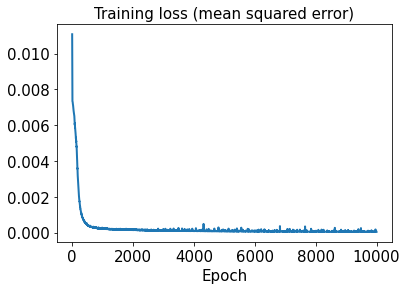

In [35]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

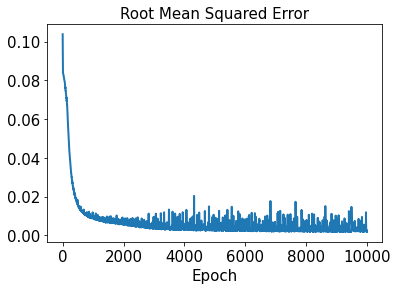

In [36]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [38]:
test_results = sd.evaluate(tsr_theta_train)

13/13 [==============================] - 0s 9ms/step - loss: 3.7153e-05 - rmse: 0.0000e+00


In [39]:
decoded_train = sd.predict(tsr_theta_train)

In [40]:
decoded_test = sd.predict(tsr_theta_test)

In [41]:
error_train_abs = np.abs(decoded_train - y_train)

In [42]:
error_test_abs = np.abs(decoded_test - y_test)

In [43]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.00058233255


In [44]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.010227745


In [45]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.00046242482, 0.00053639023, 0.00023596195, 0.0006599722, 0.0007940982, 0.00018288019, 0.00045260924, 0.00045136132, 0.00062312355, 0.0005239146, 0.0010122089, 0.00048526123, 0.00038246525, 0.001615259, 0.0009553414, 0.0005321461, 0.00043928574, 0.00039653268, 0.00045345572, 0.00043721983, 0.00052418705, 0.0007380362, 0.00074948004, 0.00092359364, 0.0005070876, 0.0004520663, 0.000528614, 0.00028280192, 0.00043690807, 0.00039874163, 0.00053224055, 0.000488089, 0.0005104672, 0.0006154345, 0.00042042026, 0.00041513387, 0.000278837, 0.00036504059, 0.00067157584, 0.0007243602, 0.00068737, 0.0006705155, 0.00050122367, 0.0015984438, 0.00027665801, 0.0003855498, 0.00058355305, 0.00026911855, 0.0006016922, 0.00023375166, 0.0003924374, 0.00033024326, 0.0004810803, 0.00041719645, 0.0007532804, 0.0004599713, 0.00052650337, 0.00043818422, 0.0005506123, 0.00037883833, 0.00049896835, 0.0005390751, 0.00051323447, 0.00045537256, 0.00046897045, 0.0003477402, 0.000414502, 0.00073901424, 0.0005426284, 0

In [46]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.027382674, 0.0008445016, 0.00081067416, 0.0012565905, 0.00050625403, 0.021190992, 0.015635282, 0.0009817273, 0.000988291, 0.0006691646, 0.070624985, 0.0015147035, 0.00053749233, 0.00059127196, 0.0005560377, 0.0021844432, 0.0012101928, 0.00056047627, 0.23663254, 0.0006613008, 0.00075077213, 0.0005383473, 0.0007914351, 0.00082543754, 0.0006059215, 0.0011955866, 0.001900147, 0.003148198, 0.00081467594, 0.0011272604, 0.00078517146, 0.003972459, 0.00039585232, 0.0008091572, 0.0013799239, 0.016131565, 0.0010395858, 0.00079719524, 0.0010721019, 0.00073190534, 0.0009466189, 0.001173887, 0.0005308707, 0.001147116]


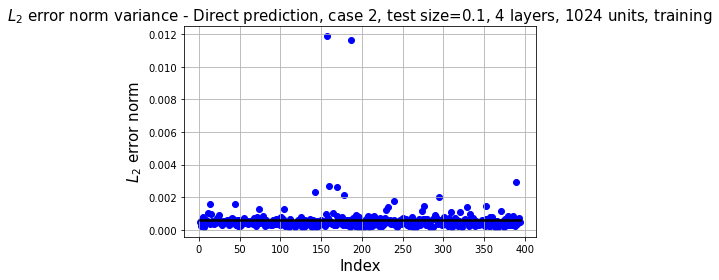

In [53]:
plt.plot(np.linspace(1, tsr_theta_train.shape[0], tsr_theta_train.shape[0]),
         l2_error_train*np.ones(x_train.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, tsr_theta_train.shape[0], tsr_theta_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Direct prediction, case 2, test size=0.1, 4 layers, 1024 units, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

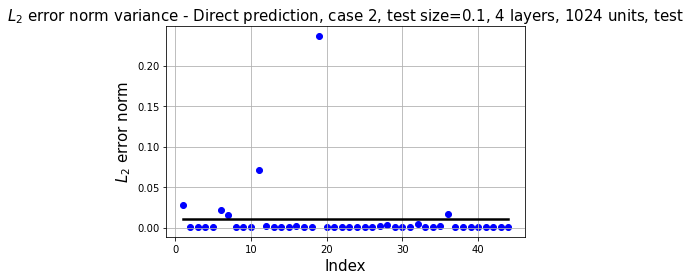

In [54]:
plt.plot(np.linspace(1, tsr_theta_test.shape[0], tsr_theta_test.shape[0]),
         l2_error_test*np.ones(tsr_theta_test.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], tsr_theta_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Direct prediction, case 2, test size=0.1, 4 layers, 1024 units, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

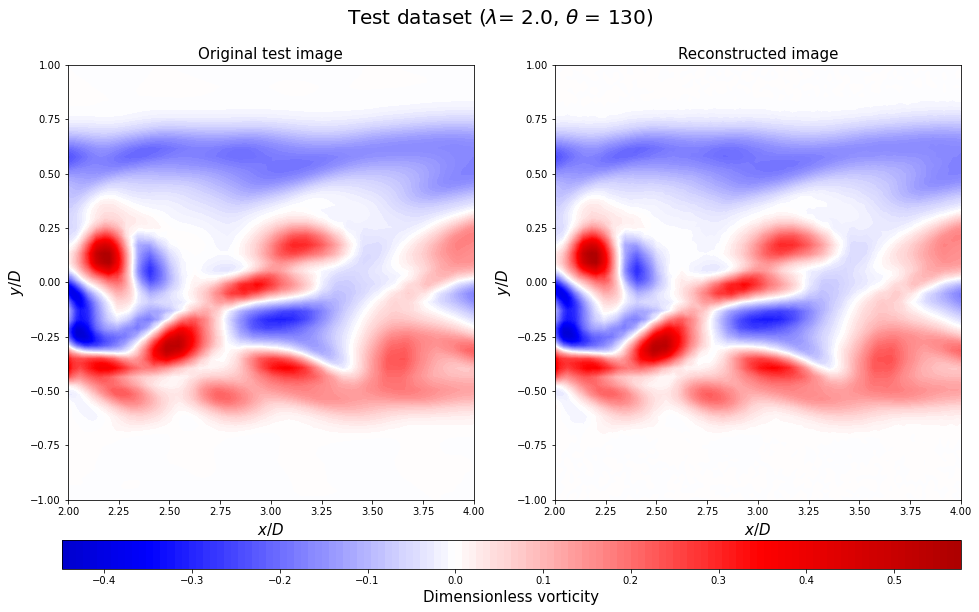

In [49]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

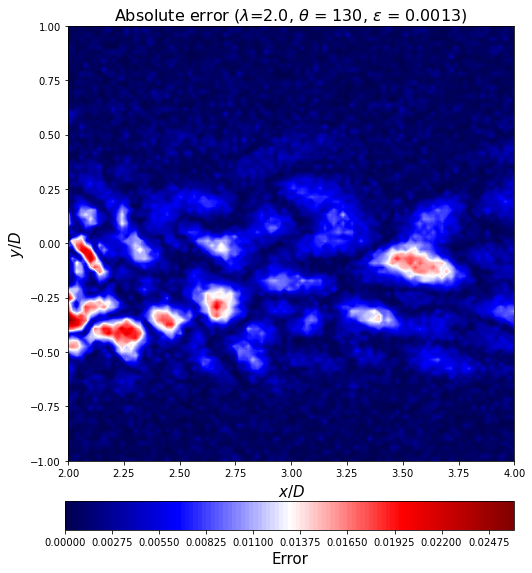

In [50]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()